In [ ]:
"""
    ATTN: 
    please read following before reviewing or running this code
    1) 
    some of the cell (specially base model experiments) may not reproduce same results 
    due to same function called with minor changes *quick experiments*  
    ** would parameterize for better interpretability 

    2) 
    coding strucutre is a working / model dev format: for project or final pipeline pov would   
    design classes and put *final inference* point with all reusable functions one place. 
    ** would cleanup and automate for reusbality standpoint as needed
    
    ** pls navigate thru outline from left panel
    

""" 

In [ ]:
"""

Chain of thoughts  (initial) --> read cell notes for actual action / results

- data insights: 
    load data, overview, types (categorical if any) 
    quick look on key attributes freq/distr 
    understand target(y), independent vars
     
- determine success metric: 
    business goal to model goals
    evals   

- modelling approach: 
    algo and why 
    other approach / benchmarking
    assumptions, future data
    segmentation if needed

- vintage selection / population choices:  
    based on sample size 
    other factors to consider are seasonality, performance trend 
    population or exclusions waterfall if any 
    ** revisit later after model evaluated for further improvement

- base or benchmark model  
    
- preprocessing 
    depending on algo, any missing or special values treatments

- feature selection
    # of features, encodings if any
    apply domain knowledge 

- model training 
    method 
    hyperparams

- evals 
    model performance
    stability 
    overfitting

- final model selection



other standard steps (may not be covered) 
- testing 
    stress test or bootstrapping 
- saving and version control
- containerize and ready for inference  
- tracking performance ~ early then short to long term



"""

## install dependancies (consolidated)

In [3]:
### remove from requirements.txt if not used later 

In [1]:
%%capture
%pip install -q pandas numpy matplotlib seaborn featuretools scikit-learn xgboost

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import featuretools as ft
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import json
import warnings
warnings.filterwarnings('ignore')


# 1. Data and initial insights

In [ ]:
# load the dataset 

# for larger data would consider using parquet format or spark distribution  


in_df = pd.read_csv('<Model Test Data>')
print(f"{in_df.shape}")

(10000, 11)


In [4]:
in_df.head(2)

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,58.891377,5285.076955,8102.610429,-142802.4627,0.731818,61045.68645,183502.7911,2418498.392,27880.60083,360626.7592,4
1,57.641838,2094.137183,7432.119245,-147434.0657,2.527586,48485.22029,232809.7287,1779351.332,32153.75776,382670.3624,5


In [5]:
in_df.describe()

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,12.190351,8445.963010,3450.252510,168505.815510,1.610510,73390.402240,85873.402570,1.150636e+06,22190.066240,153862.395490,3.032500
std,16.020137,3540.407793,2544.552718,154606.758685,0.799212,42488.751840,71600.020020,8.840513e+05,9835.270071,84665.459925,1.410901
min,-20.486397,-5583.153749,-6338.250221,-439972.812600,-1.328607,-77050.448580,-162312.422300,-2.692945e+06,-12674.425590,-135125.465700,1.000000
25%,0.342919,6012.666381,1689.792306,64840.482335,1.070263,44707.280773,37958.405845,5.353268e+05,15593.819880,96818.711418,2.000000
50%,10.881019,8463.373285,3430.595021,167029.781400,1.598712,73543.761555,86582.980525,1.149984e+06,22091.102400,154089.232450,3.000000
75%,23.047831,10864.843605,5165.408836,272343.174250,2.146489,102189.829900,133951.621325,1.742196e+06,28924.445840,211875.685575,4.000000
max,94.749833,23299.976630,12288.699000,857156.728100,4.639956,242913.447400,357758.526300,4.315470e+06,58807.189120,473752.797700,5.000000


In [6]:
# vars = in_df.select_dtypes(include=np.number).columns.tolist()

# for col in vars:
#     miss_cnt = in_df[col].isnull().sum()
#     if miss_cnt > 0: 
#         print(f"{col} Missing%: {miss_cnt} ({miss_cnt/len(in_df)*100}%)")
#     else:
#         print(f"{col} No missing")

import gc
gc.collect()

0

In [7]:

# check for missing values 

def check_missing_vals(df):
    """ input df 
        return: dataframe with missing numbers 
        
    """
    cols = df.columns.values
    res_df = pd.DataFrame(data=cols, columns=['columns'])

    res_df['miss_val_cnt'] = np.nan
    res_df['miss_val_pct'] = np.nan 

    for i,v in enumerate(cols):
        res_df.loc[i, 'miss_val_cnt'] = df[v].isnull().sum()
        res_df.loc[i, 'miss_val_pct'] = round(df[v].isnull().sum()/df.shape[0],3)*100

    return res_df

In [8]:
check_missing_vals(in_df)

,columns,miss_val_cnt,miss_val_pct
0,y,0.0,0.0
1,var_1,0.0,0.0
2,var_2,0.0,0.0
3,var_3,0.0,0.0
4,var_4,0.0,0.0
5,var_5,0.0,0.0
6,var_6,0.0,0.0
7,var_7,0.0,0.0
8,var_8,0.0,0.0
9,var_9,0.0,0.0


### findings
- continous target variable with negative values  
    - indicates regression problem 
    - P&L or financial returns
- all independent vars are continuos, 
- no categorical attributes 
- missing imputation not required 
- special values might present

next steps: check distr and skewness

<Axes: xlabel='y', ylabel='Count'>

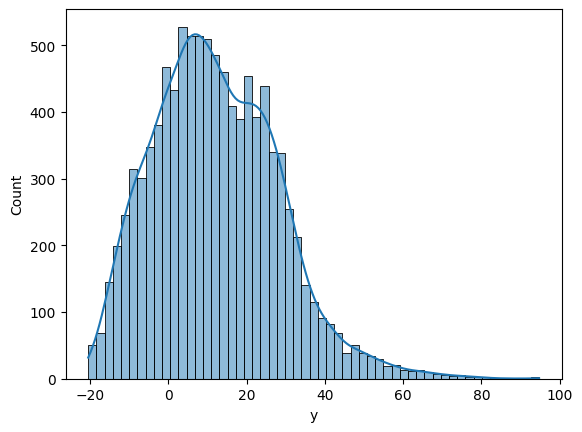

In [9]:
# check for distribution 

sns.histplot(data=in_df, x="y", log_scale=False, kde=True)


<Axes: xlabel='var_9', ylabel='Count'>

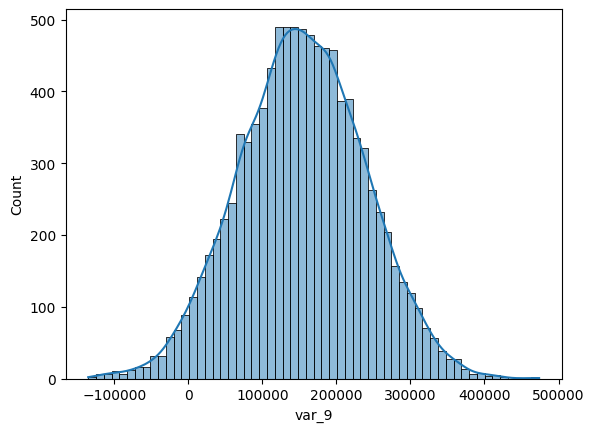

In [10]:
# sns.histplot(data=in_df, x="var_1", log_scale=False, kde=True) 
# skewed 

# sns.boxplot(data=in_df["var_1"], orient="h")
# plt.show()

sns.histplot(data=in_df, x="var_9", log_scale=False, kde=True) 


In [11]:
skewness_values = in_df.skew(numeric_only=True).sort_values(ascending=False)
print(skewness_values)

y         0.557839
var_4     0.030516
var_2     0.016924
var_8     0.015441
var_3     0.011959
var_7     0.009582
var_5     0.002560
var_1    -0.010193
var_9    -0.021880
var_10   -0.036614
var_6    -0.036691
dtype: float64


Text(0.5, 1.0, 'Correlation heatmap of numeric features')

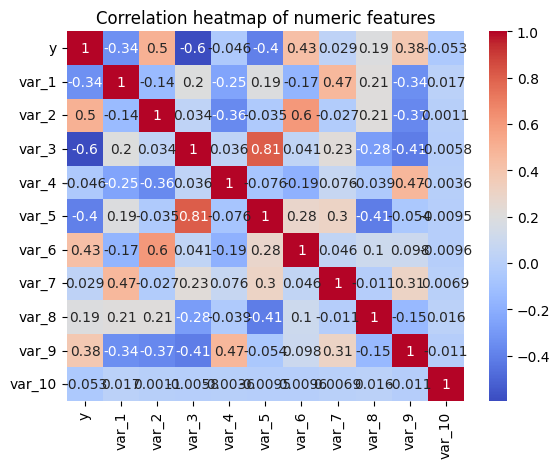

In [12]:
# plt.Figure(figsize=(20,10))
sns.heatmap(in_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap of numeric features')

Heatmap shows 
- var_3 and var_5 has strong corr 
- both var_3 and var_5 has moderate corr with target 
- var_5 could potentially be looked at to drop 
- will make decision after algorithm selection

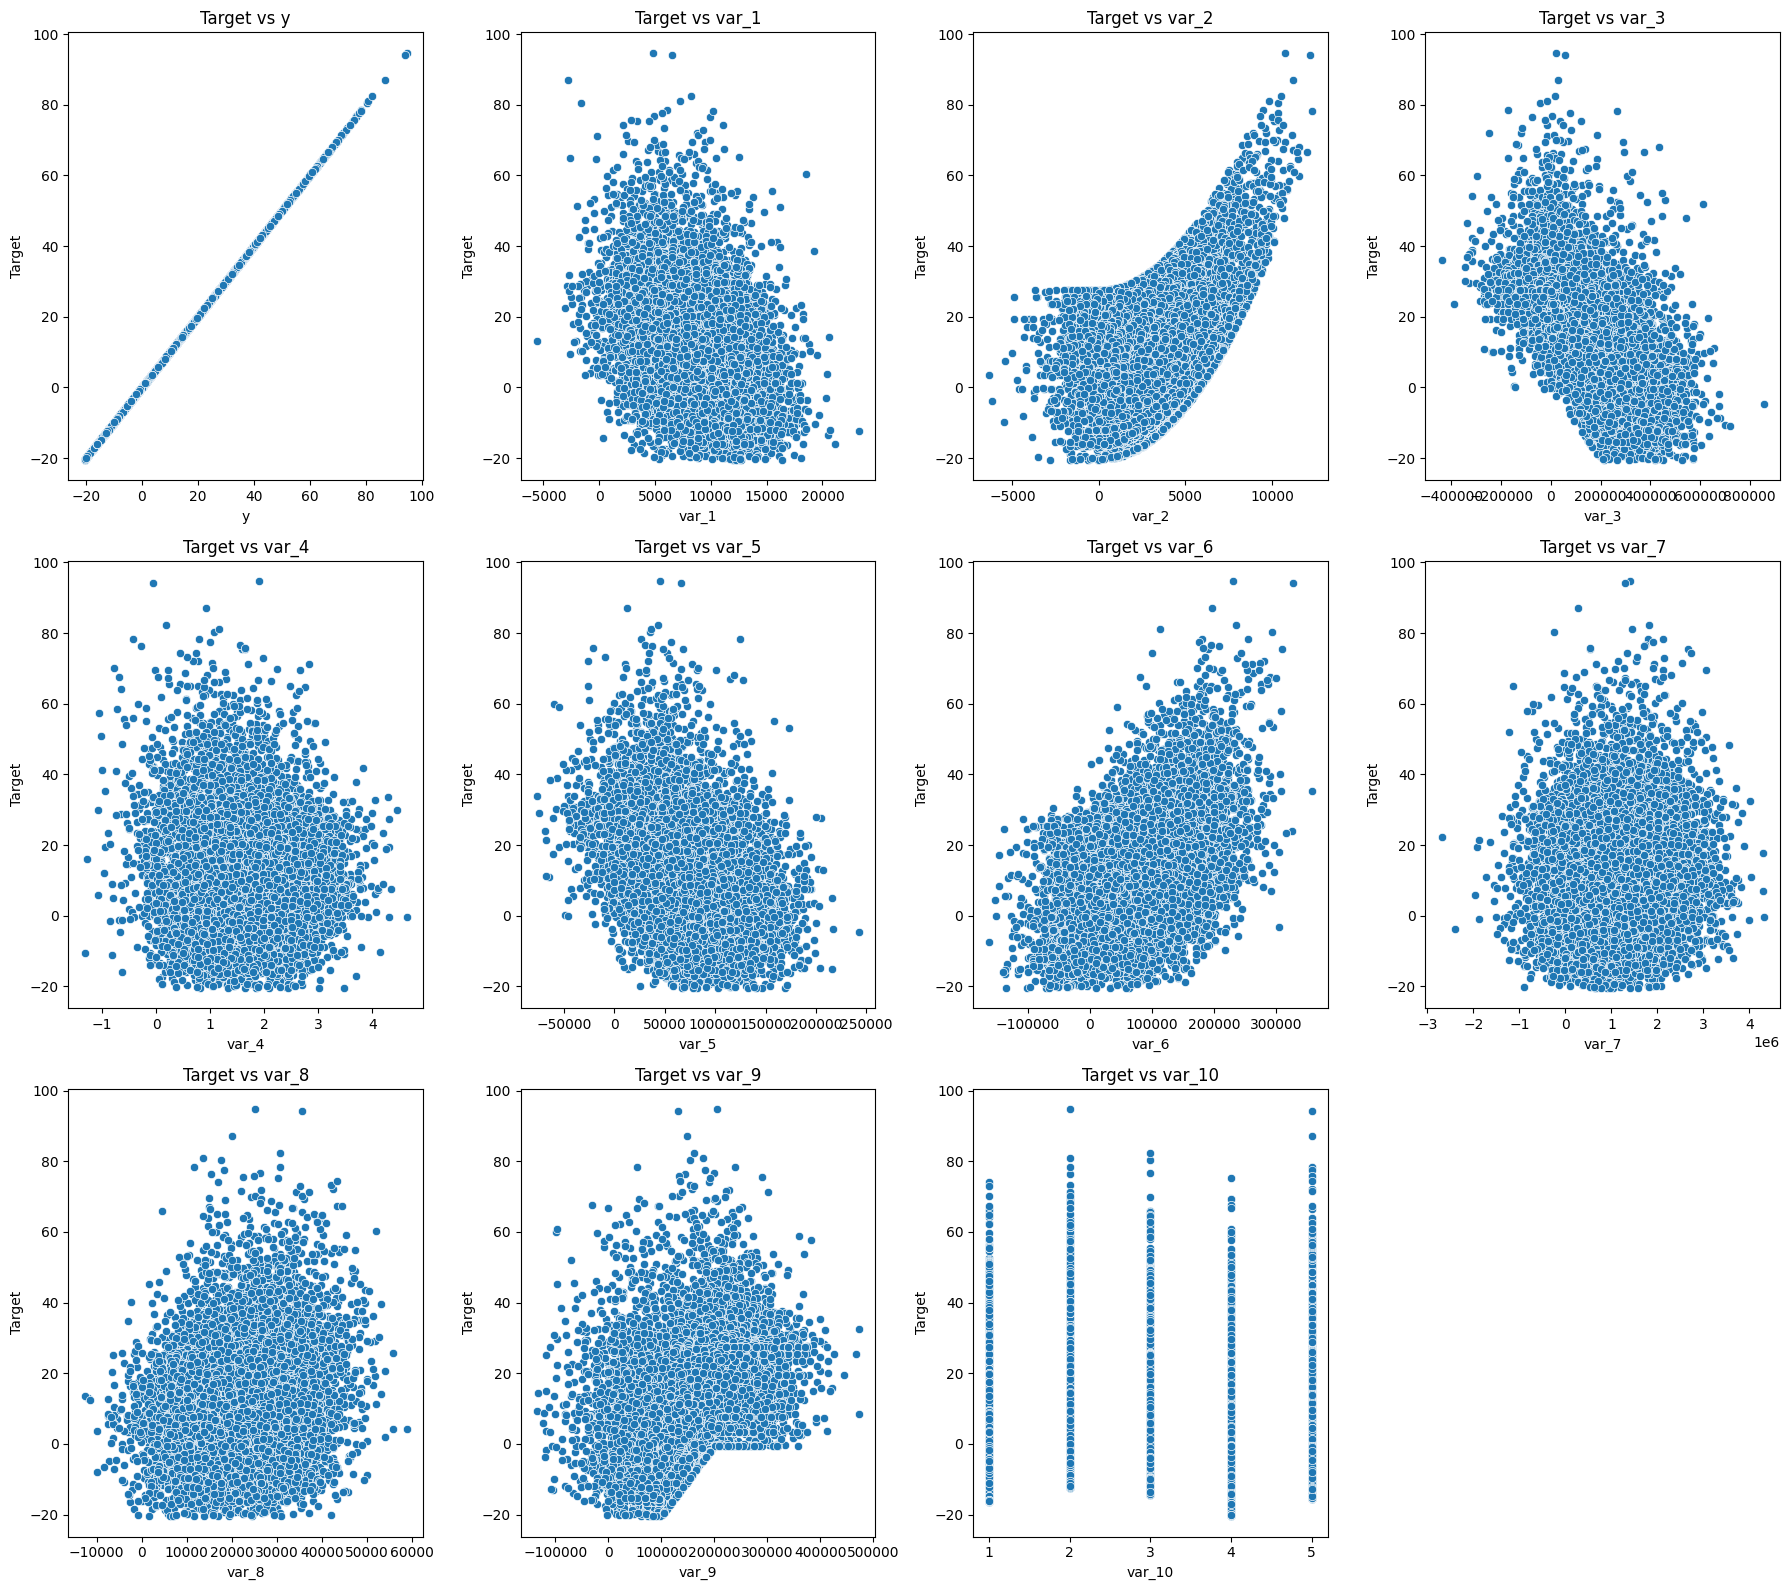

In [13]:

vars = in_df.select_dtypes(include=np.number).columns.values

plt.figure(figsize = (18, 16))

for i, feat in enumerate(vars, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(data=in_df, x=feat, y="y")
    plt.title(f"Target vs {feat}")
    plt.xlabel(feat)
    plt.ylabel("Target")

plt.tight_layout()
plt.show()

scatterlot obs: 
- most of the features have similar patterns - wide distribution with just few outliers for higher y
- var_2 and var_3 looks interesting with generally upward/downward trend wrt y 
- final take: outlier preprocessing would not be necessary 
- will revist post algo selection or base model

### findings2
- for independent vars skewness are in acceptable range  
- target variable skewness is moderate, transformation may benefit 
- outliers analysis may revisit, no significant obs in box plots
- **robust regression algo will handle the distribution and outliers 
- see more explanations below


# 2. determine success metric

### business goal to ML problem 
- Target variable analysis shows that the business is looking to 
    - estimate or predict PnL or similar financial returns in percentage 
- different approach consideration: 
    - may consider later for target transformation from percentage to absolute 
    - analysis on the underling logic
- for this assessment i will go ahead with true target variable considering 
    - regression based algorithms capable of handling true target with negative values
    - model will be true representation and easy for business interpretation
-  in terms of eval metrics 
    - RMSE or R-sqr both good magnitude and bi-directional   
    - outliers not significant starting with RMSE   


# 3. Modelling approach

### algorithm choice and others
- for this ml problem ensemble or tree based algorithms would be good choice 
    - structured tab data
    - ensemble method handles non linear relationship 
    - doesn't require to handle multi colinearity  
    - handles data skewness  
- would consider few industry proven: xgboost and random forest models  
- for this problem at hand i would consider xgboost and possibly challenge or benchmark with RF

Assumptions (important): 
- Selected test data would be the best representation of how the future data would look like, which might change (model tracking would cover that part) 
- assumes no seasonality with no time period data  



In [ ]:
import sys
print(sys.executable)

# 4. vintage selection / population choices

### key points
- population exclusions not in scope
- segementation analysis (single model vs 1+ models) was not required 
    - based on the data and problem statement
- validation set to be kept for independent eval  (true model unseen data)
- based on the sample size, will consider non-stratified split of train , test and validation set 

# 5. Base / benchmark model

### why base 
- quick estimate of where we stand  
- default params / based on industry experience 
- include all features 
- easier to build on it

Pending consolidate pip installs to the top

In [15]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
 

def xgb_model_benchmark(df, target_col="y", model_ver="x1", num_round=100):
    """ 
    
    Perform benchmarking using xgboost regression train

    input:
        data with features and target 
        later add more inputs: split_method=1, strtfy=0

    returns:  
        eval log, y_preds
    """

    print(f"Initial number of variables: {len(df.columns.tolist())} \n")
    # initial_feats = df.columns.tolist()

    # prepare modelling datasets
    # input data 
    col = [x for x in df.columns if x not in target_col ]
    # col = [x for x in df.columns if x not in [target_col, 'var_10'] ]
    X_in = df[col]
    y_in = df[target_col]
    print(f"final number of variables: {len(X_in.columns.tolist())} \n")

    # split the data into sets 
    X_train, X_tmp, y_train, y_tmp = train_test_split(X_in, y_in, test_size=0.3, random_state=1234, stratify=None)
    X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=1234, stratify=None)

    # dmatrix for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test, label=y_test)


    # param setting
    param = {
        'booster' : "gbtree", 
        'objective' : "reg:squarederror", 
        'eval_metric' : "rmse", 
        'eta' : 0.1, 
        # 'gamma' : 0, 
        # 'alpha' : 0, 
        # 'lambda' : 1,
        'max_depth' : 3, 
        'subsample' : 1, 
        'colsample_bytree' : 1, 
        'tree_method' : "hist",
        'grow_policy' : "depthwise",
        # 'interaction_constraints': [['var_10', 'var_1']], --testing
        'seed' : 1234 
    }
    num_of_rounds = num_round
    watch_list = [(dtrain, 'train'), (dval, 'val')]
    eval_log = dict()
    base_m = xgb.train(param, dtrain, num_of_rounds, evals=watch_list, evals_result=eval_log , early_stopping_rounds=50, verbose_eval=50)

    # save the model 
    base_m.save_model("model_objects/model_base_"+model_ver+".json")

    bst_iter = base_m.best_iteration
    bst_scr = base_m.best_score
    print(f"Best iteration found:{bst_iter} and best rmse at that point:{bst_scr}")
    print(f"RMSE for best iter, Train:{eval_log['train']['rmse'][bst_iter]} and Val:{eval_log['val']['rmse'][bst_iter]}")

    # pred on the test set 
    test_preds = base_m.predict(dtest)

    # evaluate the model on the test set 
    eval_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    print(f"Test RMSE:{eval_rmse}")

    return  eval_log, y_test, test_preds 

** make sure to document the findings separately

In [17]:
# eval_log['val']['rmse'][99]

In [18]:
# first step: standard params with 100 rounds

eval_log, y_test , test_preds = xgb_model_benchmark(in_df, model_ver="v1", num_round=100)

Initial number of variables: 11 

final number of variables: 10 

[0]	train-rmse:14.93010	val-rmse:14.03355
[50]	train-rmse:1.70018	val-rmse:1.70044
[99]	train-rmse:0.92613	val-rmse:0.92665
Best iteration found:99 and best rmse at that point:0.9266479949377359
RMSE for best iter, Train:0.9261272154807615 and Val:0.9266479949377359
Test RMSE:1.0917088456700905


In [19]:
# with early stopping and best iter
# eval_log, y_test , test_preds = xgb_model_benchmark(in_df, model_ver="v2", num_round=100)

# early stopping does not help with 100 rounds for now, will check during tuning process 

In [20]:
# 200 rounds

eval_log, y_test , test_preds = xgb_model_benchmark(in_df, model_ver="v3", num_round=200)

Initial number of variables: 11 

final number of variables: 10 

[0]	train-rmse:14.93010	val-rmse:14.03355


[50]	train-rmse:1.70018	val-rmse:1.70044
[100]	train-rmse:0.92191	val-rmse:0.92481
[150]	train-rmse:0.80952	val-rmse:0.82275
[199]	train-rmse:0.74111	val-rmse:0.76907
Best iteration found:199 and best rmse at that point:0.7690748846302523
RMSE for best iter, Train:0.7411072555722268 and Val:0.7690748846302523
Test RMSE:1.0021671044842881


making the model more complex causing overfitting

In [21]:
# var_10 dropped

eval_log, y_test , test_preds = xgb_model_benchmark(in_df, model_ver="v4", num_round=100)

Initial number of variables: 11 

final number of variables: 10 

[0]	train-rmse:14.93010	val-rmse:14.03355
[50]	train-rmse:1.70018	val-rmse:1.70044
[99]	train-rmse:0.92613	val-rmse:0.92665
Best iteration found:99 and best rmse at that point:0.9266479949377359
RMSE for best iter, Train:0.9261272154807615 and Val:0.9266479949377359
Test RMSE:1.0917088456700905


In [22]:
# var_10 feat interaction

eval_log, y_test , test_preds = xgb_model_benchmark(in_df, model_ver="v5", num_round=100)

Initial number of variables: 11 

final number of variables: 10 

[0]	train-rmse:14.93010	val-rmse:14.03355
[50]	train-rmse:1.70018	val-rmse:1.70044
[99]	train-rmse:0.92613	val-rmse:0.92665
Best iteration found:99 and best rmse at that point:0.9266479949377359
RMSE for best iter, Train:0.9261272154807615 and Val:0.9266479949377359
Test RMSE:1.0917088456700905


Dropping var_10 does not help and interaction constraint version was just experimenting 

In [23]:
y_test.head(5)

7124     1.551242
8535    -7.011771
537     34.054727
2582    23.559365
4009    13.744927
Name: y, dtype: float64

In [24]:
test_preds[:5]

array([ 1.4926674, -7.416854 , 31.865871 , 23.796642 , 13.80329  ],
      dtype=float32)

# 6. Feature engineering

### a. preprocessing

some of these are covered in data insights part, my approach would be as following like preprocessing and cat encoding not required as mentioned. 

additional thoughts:  
- one thing crossed my mind is about **feature scaling / normalization** 
- var_10 is integer (low cardinal so appears derived from categories) as compared to all other features
- ** ensemble model like xgboost/RF are less sensitive to scaling 

In [25]:
# drop any irrevalant features 
# in_df.columns.tolist()
in_df['var_10'].value_counts(dropna=False)

var_10
4    2086
5    2033
3    1989
2    1957
1    1935
Name: count, dtype: int64

In [26]:

# vars = in_df.select_dtypes(include=np.number).columns.values

# plt.figure(figsize = (18, 16))

# for i, feat in enumerate(vars, 1):
#     plt.subplot(3, 4, i)
#     sns.scatterplot(data=in_df, x=feat, y="var_10")
#     plt.title(f"var_10 vs {feat}")
#     plt.xlabel(feat)
#     plt.ylabel("var_10")

# plt.tight_layout()
# plt.show()

### b. new features  

we may try few directions 
- i will try create new interaction features 
- *** here i went back to base model and tried few things var_10 interaction with other features and the model perf improved significantly **
- i would do more research is to leverage xgboost feature interaction 
- create new features manually as multiply or ratio (with some level of domain  knowledge) 
- also auto methods (featuretools)

### c. feature selection

In [27]:

# test set not used instead increased train and val set 

def feat_sel_xgb_model(df, target_col="y", gain_thresh=0):
    """ 
    inputs: 
        processed data
        target variable
        for later: gain threshold, learning rate range  
    
    output: 
        final feature list
    """

    print(f"Initial number of variables: {len(df.columns.tolist())} \n")
    
    return_feat_list=[]

    # prepare modelling datasets
    # input data 
    col = [x for x in df.columns if x not in target_col ]
    # col = [x for x in df.columns if x not in [target_col, 'var_10'] ]
    X_in = df[col]
    y_in = df[target_col]
    print(f"final number of variables: {len(X_in.columns.tolist())} \n")

    # split the data into sets 
    X_train, X_val, y_train, y_val = train_test_split(X_in, y_in, test_size=0.2, random_state=1234, stratify=None)

    # dmatrix for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    # dtest = xgb.DMatrix(X_test, label=y_test)


    # param setting
    param = {
        'booster' : "gbtree", 
        'objective' : "reg:squarederror", 
        'eval_metric' : "rmse", 
        'eta' : 0.1, 
        # 'gamma' : 0, 
        # 'alpha' : 0, 
        # 'lambda' : 1,
        'max_depth' : 3, 
        'subsample' : 1, 
        'colsample_bytree' : 1, 
        'tree_method' : "hist",
        'grow_policy' : "depthwise",
        'seed' : 1234 
    }
    num_of_rounds = 100
    watch_list = [(dtrain, 'train'), (dval, 'val')]
    eval_log = dict()
    base_m = xgb.train(param, dtrain, num_of_rounds, evals=watch_list, evals_result=eval_log , early_stopping_rounds=50, verbose_eval=50)

    bst_iter = base_m.best_iteration
    bst_scr = base_m.best_score
    print(f"Best iteration found:{bst_iter} and best rmse at that point:{bst_scr}")

    # feature importance
    feat_imp = base_m.get_score(importance_type="total_gain")
    # sort_feat_imp = sorted(feat_imp.items(), key=lambda x: x[1], reverse=True)
    # print(f"Feature importance by Gain method:")
    # for feat, imp in sort_feat_imp:
    #     print(f"Feature:{feat} & importance:{imp:.4f}")
    imp_vars = list(feat_imp.keys())
    total_gain_vars = list(feat_imp.values())
    importance = pd.DataFrame(data=total_gain_vars, index=imp_vars, columns=["gain"]).sort_values(by="gain", ascending=False)
    importance["gain"] = importance["gain"]*100 / sum(importance["gain"])

    # set threshold for feat selection 
    sel_feats = importance[importance['gain'] > gain_thresh]
    
    return_feat_list = sel_feats.index.tolist()

    return  importance , return_feat_list

In [28]:
# call the feature importance func 

out_feat_imp, final_feats = feat_sel_xgb_model(in_df, gain_thresh=0.0002)
out_feat_imp

Initial number of variables: 11 

final number of variables: 10 

[0]	train-rmse:14.84781	val-rmse:14.79215
[50]	train-rmse:1.63860	val-rmse:1.79743
[99]	train-rmse:0.88039	val-rmse:1.00896
Best iteration found:99 and best rmse at that point:1.0089560226287384


,gain
var_2,39.590432
var_3,38.047881
var_9,19.720643
var_10,2.583173
var_6,0.056893
var_7,0.000677
var_1,0.000245
var_5,0.000056


Results
- var_4, var_8 has 0 gains does not appear on importance 
- var_5 has low importance gain and i would drop it from the model, possibly var_1 as well but considering there are limited features i would just drop var_5 

- in a project setup where lot of feature would be present 
- I would build or update the function to do this recursively for some range of parameters such as learning rate until best model is selected 
- output of this function would be to select final list of variables after dropping
- then that would be the input to the next step in modelling

In [29]:
final_feats

['var_2', 'var_3', 'var_9', 'var_10', 'var_6', 'var_7', 'var_1']

In [30]:
# just to see the abs gain values
# out_feat_imp = feat_sel_xgb_model(in_df)

In [ ]:
# retrain with same setting to validate the results 

def xgb_model_reduced_train(df, target_col="y", featlist=final_feats, model_ver="x1", num_round=100):
    """ 
    
    Perform training on reduced feature using xgboost regression train

    input:
        data with features and target 
        target variable
        feature list: selected from feature selection process        

    returns:  
        xgb model saved and evals
    """

    print(f"Initial number of variables: {len(df.columns.tolist())} \n")

    # prepare modelling datasets
    # input data 
    X_in = df[final_feats]
    y_in = df[target_col]
    print(f"final number of variables: {len(X_in.columns.tolist())} \n")

    # split the data into sets 
    X_train, X_tmp, y_train, y_tmp = train_test_split(X_in, y_in, test_size=0.3, random_state=1234, stratify=None)
    X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=1234, stratify=None)

    # dmatrix for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test, label=y_test)


    # param setting
    param = {
        'booster' : "gbtree", 
        'objective' : "reg:squarederror", 
        'eval_metric' : "rmse", 
        'eta' : 0.1, 
        # 'gamma' : 0, 
        # 'alpha' : 0, 
        # 'lambda' : 1,
        'max_depth' : 3, 
        'subsample' : 1, 
        'colsample_bytree' : 1, 
        'tree_method' : "hist",
        'grow_policy' : "depthwise",
        'seed' : 1234 
    }
    num_of_rounds = num_round
    watch_list = [(dtrain, 'train'), (dval, 'val')]
    eval_log = dict()
    base_m = xgb.train(param, dtrain, num_of_rounds, evals=watch_list, evals_result=eval_log , early_stopping_rounds=50, verbose_eval=50)

    # save the model 
    base_m.save_model("model_objects/model_feat_"+model_ver+".json")

    bst_iter = base_m.best_iteration
    bst_scr = base_m.best_score
    print(f"Best iteration found:{bst_iter} and best rmse at that point:{bst_scr}")
    print(f"RMSE for best iter, Train:{eval_log['train']['rmse'][bst_iter]} and Val:{eval_log['val']['rmse'][bst_iter]}")

    # pred on the test set 
    test_preds = base_m.predict(dtest)

    # evaluate the model on the test set 
    eval_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    print(f"Test RMSE:{eval_rmse}")

    return  eval_log

In [32]:
result = xgb_model_reduced_train(in_df, model_ver="v1")

Initial number of variables: 11 

final number of variables: 7 

[0]	train-rmse:14.93010	val-rmse:14.03355
[50]	train-rmse:1.70018	val-rmse:1.70044
[99]	train-rmse:0.92642	val-rmse:0.92813
Best iteration found:99 and best rmse at that point:0.9281317486202554
RMSE for best iter, Train:0.9264192375648249 and Val:0.9281317486202554
Test RMSE:1.0927066572690476


Evidence after feature selection
- minor improvement but less complex


# 7. Model tuning 

### approach
 - multiple ways, 
 - manual tuning for key params: tuning one param with knowledge on good range and providing initial values for others 
 - better approach -- optuna which uses baysian optimization technique   
 - for simplicity we will use gridsearch method here

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
def xgb_model_tuning(df, target_col="y", featlist=final_feats, cv_folds=5):
    """ 
    Perform hyperparameter tuning using gridsearch 

    inputs: 
        data with features and target
        target variable
        feature list: selected from feature selection process
        cross val folds
        for later: 

    output: 
        dict best params and metrics 
    """

    print(f"Initial number of variables: {len(df.columns.tolist())} \n")

    print(f"Hyperparam tuning starts..")

    # prepare modelling datasets
    # input data 
    X_in = df[final_feats]
    y_in = df[target_col]
    print(f"final number of variables: {len(X_in.columns.tolist())} \n")

    # split the data into sets 
    X_train, X_test, y_train, y_test = train_test_split(X_in, y_in, test_size=0.2, random_state=1234, stratify=None)

    # dmatrix for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)


    # define the ranges
    param_space = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 3],
        'learning_rate': [0.01, 0.1, 0.2],
        # 'subsample': [0.8, 0.9, 1.0],
        # 'colsample_bytree': [0.9, 1.0],
        # 'reg_alpha': [0, 0.1, 1, 2],
        # 'reg_lambda': [1, 1.5, 2, 3],
        'verbosity': [1] # --> this fixed the error, default 50 was being used by gridsearch  
    }

    print("Parameter Grid:")
    for param, values in param_space.items():
        print(f"{param}: {values}")
    print(f"\nTotal combinations: {np.prod([len(v) for v in param_space.values()])}")


    # regressor
    
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse", random_state=1234, n_jobs=-1, verbosity=0, enable_categorical=False)
    
    # Perform grid search
    print("Performing Grid Search..")
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_space,
        cv=cv_folds,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # log best parameters
    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_  

    print("End of grid search..")



    param_df = pd.DataFrame(list(best_params.items()), columns=['Parameter', 'Best Value'])
    print(param_df.to_string(index=False, formatters={'Best Value': str}))
    
    print(f"Best CV RMSE: {np.sqrt(best_score):.6f}")
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    
    print(f"Test RMSE: {test_rmse:.6f}")
    print(f"Test R²:   {test_r2:.6f}")
    
    # Return results
    results = {
        'best_params': best_params,
        'best_cv_rmse': np.sqrt(best_score),
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'best_model': best_model,
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }
    
    return results


In [35]:

tuned_results = xgb_model_tuning(in_df, target_col="y", featlist=final_feats, cv_folds=5) 

Initial number of variables: 11 

Hyperparam tuning starts..
final number of variables: 7 

Parameter Grid:
n_estimators: [50, 100, 150]
max_depth: [2, 3]
learning_rate: [0.01, 0.1, 0.2]
verbosity: [1]

Total combinations: 18
Performing Grid Search..
Fitting 5 folds for each of 18 candidates, totalling 90 fits
End of grid search..
    Parameter Best Value
learning_rate        0.1
    max_depth        3.0
 n_estimators      150.0
    verbosity        1.0
Best CV RMSE: 0.986537
Test RMSE: 0.936220
Test R²:   0.996556


In [ ]:
def final_retrain_save_model(df, results, target_col="y", featlist=final_feats, model_ver="x1"):
    """
    Retrain for final model taking the hyperparameters and save the model 

    inputs: 
        data with features and target
        hyperparameters
        target variable
        feature list: selected from feature selection process
        for later: 

    output: 
        dict best params and metrics 


    """

    print(f"Initial number of variables: {len(df.columns.tolist())} \n")

    best_params = results['best_params']

    print(f"Retraining with the best parameters")

    # prepare modelling datasets
    # input data 
    X_in = df[final_feats]
    y_in = df[target_col]
    print(f"final number of variables: {len(X_in.columns.tolist())} \n")

    # split the data into sets 
    X_train, X_tmp, y_train, y_tmp = train_test_split(X_in, y_in, test_size=0.3, random_state=1234, stratify=None)
    X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=1234, stratify=None)

    # dmatrix for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # get the best params 
    num_boost_round = best_params.get('n_estimators', 100)
    max_depth = best_params.get('max_depth')
    eta = best_params.get('learning_rate')

    # print(f"num_boost_round:{num_boost_round},max_depth:{max_depth},eta:{eta}")


    # param setting
    param = {
        'booster' : "gbtree", 
        'objective' : "reg:squarederror", 
        'eval_metric' : "rmse", 
        'eta' : eta, 
        # 'gamma' : 0, 
        # 'alpha' : 0, 
        # 'lambda' : 1,
        'max_depth' : max_depth, 
        'subsample' : 1, 
        'colsample_bytree' : 1, 
        'tree_method' : "hist",
        'grow_policy' : "depthwise",
        'seed' : 1234 
    }
    num_of_rounds = num_boost_round
    watch_list = [(dtrain, 'train'), (dval, 'val')]
    eval_log = dict()
    base_m = xgb.train(param, dtrain, num_of_rounds, evals=watch_list, evals_result=eval_log , early_stopping_rounds=50, verbose_eval=50)

    print(f"Training completed..")

    # save the model 
    base_m.save_model("model_objects/model_tuned_"+model_ver+".json")

    bst_iter = base_m.best_iteration
    bst_scr = base_m.best_score
    print(f"Best iteration found:{bst_iter} and best rmse at that point:{bst_scr}")
    print(f"RMSE for best iter, Train:{eval_log['train']['rmse'][bst_iter]} and Val:{eval_log['val']['rmse'][bst_iter]}")

    # pred on the test set 
    test_preds = base_m.predict(dtest)

    # evaluate the model on the test set 
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    test_r2 = r2_score(y_test, test_preds)
    
    print(f"Test RMSE: {test_rmse:.6f}")
    print(f"Test R²:   {test_r2:.6f}")

    return 

    


In [37]:
final_retrain_save_model(in_df, tuned_results, model_ver="v1")

Initial number of variables: 11 

Retraining with the best parameters
final number of variables: 7 

[0]	train-rmse:14.93010	val-rmse:14.03355
[50]	train-rmse:1.70018	val-rmse:1.70044
[100]	train-rmse:0.92324	val-rmse:0.92538
[149]	train-rmse:0.81295	val-rmse:0.82077
Training completed..
Best iteration found:149 and best rmse at that point:0.8207670942869075
RMSE for best iter, Train:0.8129464241573626 and Val:0.8207670942869075
Test RMSE: 1.016773
Test R²:   0.996183


# 8. Evals

In [38]:
# function to be evaluate all the models 

def compare_saved_models(df, model_paths_dict, target_col="y"):
    """
    Load multiple saved XGBoost models and compare their performance metrics
    
    inputs:
        full data with all features
        target variable

        model_paths_dict : dict
            Dictionary with model names as keys and file paths as values
            Example: {'Model_v1': 'path/to/model1.json', 'Model_v2': 'path/to/model2.json'}

    Returns:
        df : Comparison table with all metrics
    """
    
    print("Model Comparison started..")
    
    results_list = []
    loaded_models = {}


    for model_name, model_path in model_paths_dict.items():
        print(f"Processing model: {model_name}")
        print(f"Path: {model_path}")
    
        try:
            # Load the model
            model = xgb.Booster()
            model.load_model(model_path)
        
            # Extract feature names from model
            model_features = model.feature_names
        
            # Prepare test dataset for this specific model
            X_model = df[model_features]
            y_model = df[target_col]
            
            if X_model is None:
                raise ValueError(f"Cannot prepare test dataset - missing required features")
            
            # split the data into sets 
            X_train, X_tmp, y_train, y_tmp = train_test_split(X_model, y_model, test_size=0.3, random_state=1234, stratify=None)
            X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=1234, stratify=None)

            # dmatrix for xgb
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dval = xgb.DMatrix(X_val, label=y_val)
            dtest = xgb.DMatrix(X_test, label=y_test)
            
            # Make predictions on eval datasets 
            y_pred_train = model.predict(dtrain)
            y_pred_val = model.predict(dval)
            y_pred_test = model.predict(dtest)
            
            # Calculate test metrics
            train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
            train_r2 = r2_score(y_train, y_pred_train)
            val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
            val_r2 = r2_score(y_val, y_pred_val)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
            test_r2 = r2_score(y_test, y_pred_test)
            
            
            # Initialize result dictionary
            result = {
                'Model_Name': model_name,
                'Num_Features': len(model_features) if model_features else X_test.shape[1],
                'Test_RMSE': test_rmse,
                'Test_R2': test_r2,
                'Val_RMSE': val_rmse,
                'Val_R2': val_r2                
            }
            
            # Store model info
            model_info = {
                'model': model,
                'features': model_features,
                'num_features': len(model_features) if model_features else X_test.shape[1]
            }
            loaded_models[model_name] = model_info
                    
            # Add training metrics
            result.update({
                'Train_RMSE': train_rmse,
                'Train_R2': train_r2
            })
            
            # Calculate overfitting indicators
            rmse_diff = train_rmse - test_rmse
            r2_diff = train_r2 - test_r2
            
            result.update({
                'RMSE_Diff_Train_Test': rmse_diff,
                'R2_Diff_Train_Test': r2_diff,
                'Overfitting_Risk': 'High' if (rmse_diff < -1 or r2_diff > 1) else 'Low'
            })

            
            results_list.append(result)
            print(f"Successfully loaded and evaluated: {model_name}")
        
        except Exception as e:
            print(f"Error loading {model_name}: {str(e)}")
            # Add error entry
            error_result = {
                'Model_Name': model_name,
                'Num_Features': np.nan,
                'Test_RMSE': np.nan,
                'Test_R2': np.nan,
                'Error': str(e)
            }
            results_list.append(error_result)

    # Create comparison DataFrame
    comparison_df = pd.DataFrame(results_list)
    
    # Sort by Test_RMSE (lower is better)
    comparison_df = comparison_df.sort_values('Test_RMSE', ascending=True)
    comparison_df = comparison_df.reset_index(drop=True)
    
    print("Model Comparison Results")

    
    return comparison_df, loaded_models

In [ ]:
# Select models
model_paths = {
    'Baseline_Model': '<your path>\\model_base_v1.json',
    'Baseline_Model2': '<your path>\\model_base_v5.json',
    'Feat_sel_Model': '<your path>\\model_feat_v1.json',
    'Tuned_Model': '<your path>\\model_tuned_v1.json'
}

# Compare selected models
comparison_df, models = compare_saved_models(in_df, model_paths)

In [ ]:
comparison_df

,Model_Name,Num_Features,Test_RMSE,Test_R2,Val_RMSE,Val_R2,Train_RMSE,Train_R2,RMSE_Diff_Train_Test,R2_Diff_Train_Test,Overfitting_Risk
0,Tuned_Model,7,1.016773,0.996183,0.820767,0.997041,0.812946,0.997456,-0.203827,0.001273,Low
1,Baseline_Model,10,1.091709,0.995600,0.926648,0.996228,0.926127,0.996698,-0.165582,0.001098,Low
2,Baseline_Model2,10,1.091709,0.995600,0.926648,0.996228,0.926127,0.996698,-0.165582,0.001098,Low
3,Feat_sel_Model,7,1.092707,0.995592,0.928132,0.996216,0.926419,0.996696,-0.166287,0.001104,Low


# 9. Final model selection

## observations: 
- All models performs relatively well, both in terms of target percent point and overfitting
- On average, predications are accurate less than 1% points
- Tuned_Model with lowest RMSE and highest r2 
    - gives <u>7.5%</u> better (test set) accuracy than the second-best model
- Tuned_Model has smaller feature list, more trees* 
- *Adaptive tuning could be considered for reducing complexity in terms of trees)


## <span style="color:green">Recommendations:</span>


- For business usecase where profit/loss margin are in the range of 20%(+/-) 
    - less than 1% point could be considered acceptable (pending approval) 
    - business tolerance for margin of error
- The difference between tuned model vs next best could be interpreted in thousands $$  
- Model: Tuned_Model
    - Predictions within 1.02% points 
    - Explains 99.6% of PnL variance
    - Less complex w/ smaller feature set 
    - Optimal choice for production inference full or a/b testing

## Follow-up business questions 

- What is the existing model or method's accuracy? 
- How does 1% prediction error in terms of business dollars converts 
- What accuracy level would be considered acceptable 

## Model constraints 
- During uncertain micro economics or market conditions
- Retraining after every 6 months would be ideal


# 10. After final model is selected 
- Testing (stress, bootstrap)
- Post processing if any depending upon the business interpretation of final model estimates 
    - may be we can give range of predictions (+/-)actual pred 
- final inference
